In [87]:
import pandas as pd
import matplotlib.pyplot as plt


In [88]:
df = pd.read_csv('BDHSC_SCC_2025_synth_data.csv')
df

,ID,Month,Gender,Ethnic,Base_Drug_Combo,Comp_INI,Comp_NNRTI,ExtraPI,ExtraPk_En,VL_M,CD4_M,Drug_M,VL,CD4,RelCD4
0,8130128040812561626,0,1,3,0,0,3,5,0,0,1,1,29.944271,793.458300,30.834505
1,8130128040812561626,1,1,3,0,0,3,5,0,0,0,1,29.241980,467.418900,30.355980
2,8130128040812561626,2,1,3,0,0,3,5,0,0,0,1,28.748991,465.124850,30.405320
3,8130128040812561626,3,1,3,0,0,3,5,0,0,0,1,28.101835,692.006900,30.248816
4,8130128040812561626,4,1,3,0,0,3,5,0,0,0,1,28.813837,641.757140,29.944712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11234155,18117203277056921559,55,1,4,0,2,3,5,1,0,0,1,8.454356,4045.386412,37.574126
11234156,18117203277056921559,56,1,4,0,2,3,5,1,0,0,1,110.025330,2685.636079,23.047465
11234157,18117203277056921559,57,1,4,0,2,3,5,1,0,0,1,9.441938,3689.274170,38.173028
11234158,18117203277056921559,58,1,4,0,2,3,5,1,0,0,1,18.851511,2755.832797,30.159213


In [89]:
regimen_columns = ["Base_Drug_Combo", "Comp_INI", "Comp_NNRTI", "ExtraPI", "ExtraPk_En"]
df["Regimen"] = df[regimen_columns].astype(str).agg("_".join, axis=1)
regimen_changes = df.groupby("ID")["Regimen"].agg(["first", "last"]).reset_index()
regimen_changes


,ID,first,last
0,30133543973798,0_1_3_5_0,0_2_3_5_1
1,198464063523553,3_3_3_1_0,2_3_3_0_1
2,277500844403792,4_3_3_4_0,0_2_3_5_1
3,427534741934736,0_3_1_5_0,0_3_1_5_0
4,480089982195338,0_3_1_5_0,0_3_2_5_0
...,...,...,...
187231,18446061799332322003,4_3_1_5_0,1_0_3_5_0
187232,18446128306909613693,0_3_2_5_0,0_3_2_5_0
187233,18446294480367750440,4_3_3_5_0,0_3_2_5_0
187234,18446335763543073043,3_3_3_1_0,0_3_2_5_0


In [90]:
def classify_regimen_switch(row):
    return "Single Regimen" if row["first"] == row["last"] else "Switched Regimen"

regimen_changes["Regimen_Status"] = regimen_changes.apply(classify_regimen_switch, axis=1)
switch_counts = regimen_changes["Regimen_Status"].value_counts()
regimen_distribution = df["Regimen"].value_counts().reset_index()
regimen_distribution.columns = ["Regimen", "Patient Count"]


Regimen Switching Summary:
Regimen_Status
Single Regimen      113547
Switched Regimen     73689
Name: count, dtype: int64

Top 10 Most Common Regimens:
     Regimen  Patient Count
0  0_3_2_5_0        2294019
1  1_0_3_5_0        1892352
2  0_3_1_5_0        1528947
3  3_3_3_1_0         970200
4  0_0_3_5_0         491190
5  1_3_3_0_0         470568
6  0_2_3_5_1         433587
7  4_3_3_4_0         404586
8  3_3_3_3_0         280077
9  0_1_3_5_0         235893


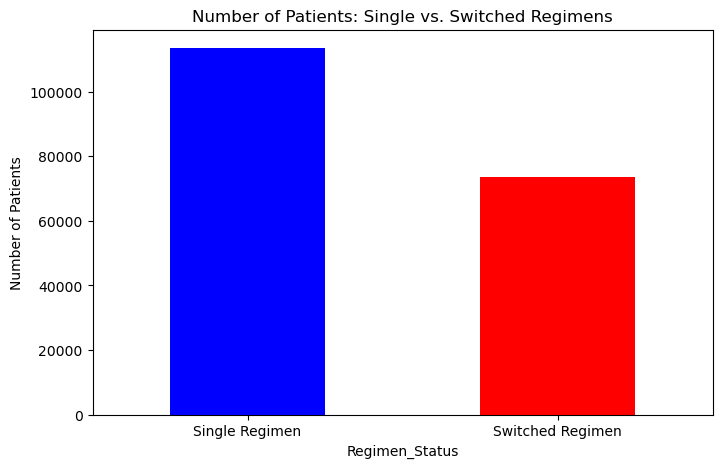

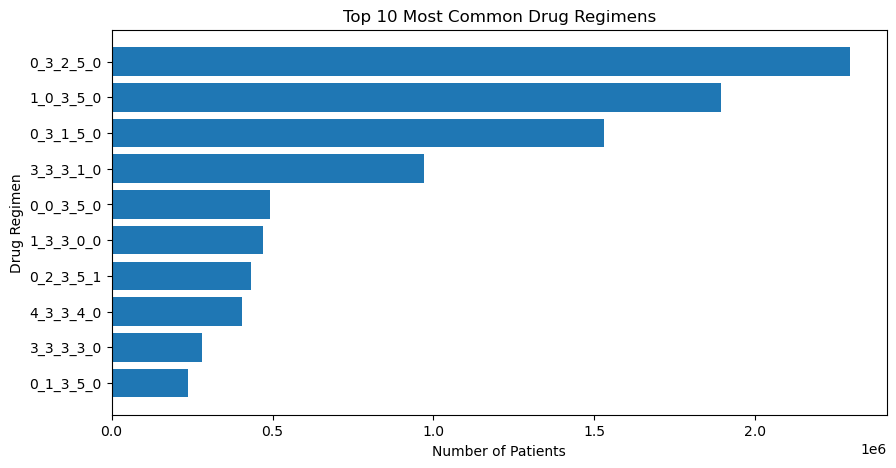

In [91]:
print("Regimen Switching Summary:")
print(switch_counts)

print("\nTop 10 Most Common Regimens:")
print(regimen_distribution.head(10))

# Visualization: Bar chart for regimen switching
plt.figure(figsize=(8, 5))
switch_counts.plot(kind="bar", color=["blue", "red"])
plt.title("Number of Patients: Single vs. Switched Regimens")
plt.ylabel("Number of Patients")
plt.xticks(rotation=0)
plt.show()

# Visualization: Top 10 most common regimens
plt.figure(figsize=(10, 5))
plt.barh(regimen_distribution["Regimen"][:10], regimen_distribution["Patient Count"][:10])
plt.xlabel("Number of Patients")
plt.ylabel("Drug Regimen")
plt.title("Top 10 Most Common Drug Regimens")
plt.gca().invert_yaxis()
plt.show()


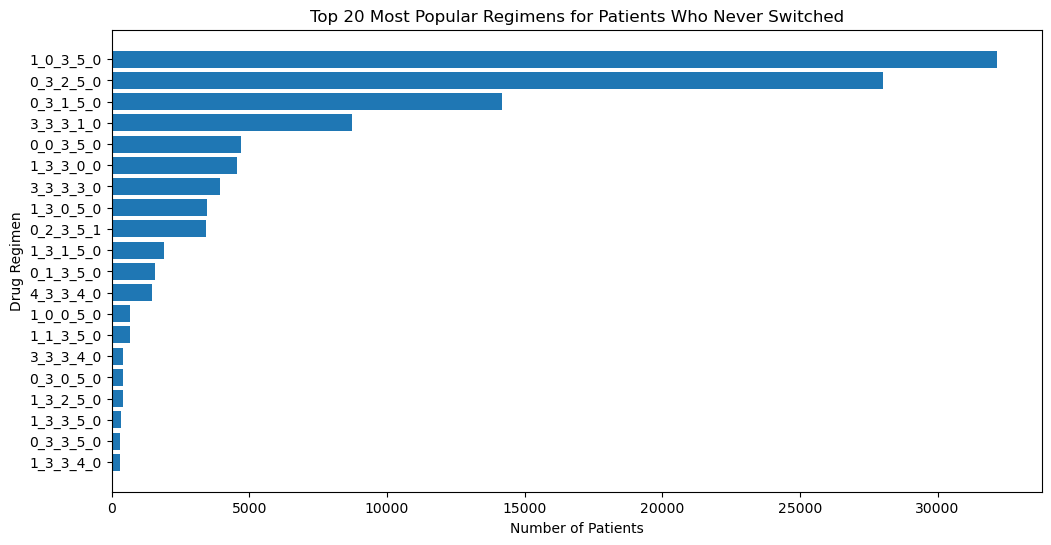

In [92]:
single_regimen_patients = regimen_changes[regimen_changes["Regimen_Status"] == "Single Regimen"]
single_regimen_counts = single_regimen_patients["first"].value_counts().reset_index()
single_regimen_counts.columns = ["Regimen", "Patient Count"]

top_20_single_regimens = single_regimen_counts.head(20)
plt.figure(figsize=(12, 6))
plt.barh(top_20_single_regimens["Regimen"], top_20_single_regimens["Patient Count"])
plt.xlabel("Number of Patients")
plt.ylabel("Drug Regimen")
plt.title("Top 20 Most Popular Regimens for Patients Who Never Switched")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


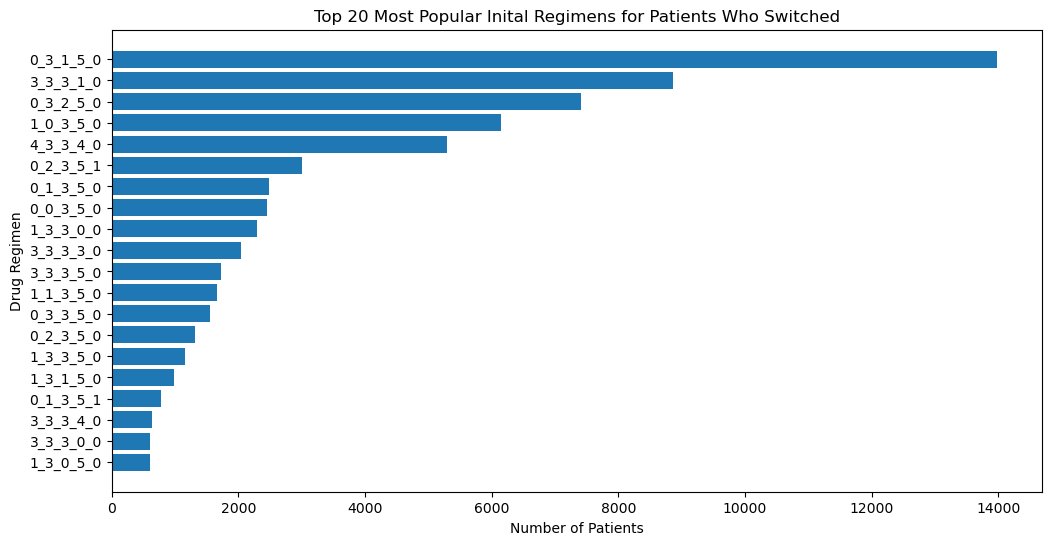

In [93]:
switch_regimen_patients = regimen_changes[regimen_changes["Regimen_Status"] == "Switched Regimen"]
switch_regimen_initial_counts = switch_regimen_patients["first"].value_counts().reset_index()
switch_regimen_initial_counts.columns = ["Inital Regimen", "Patient Count"]

top_20_switch_inital_regimens = switch_regimen_initial_counts.head(20)
plt.figure(figsize=(12, 6))
plt.barh(top_20_switch_inital_regimens["Inital Regimen"], top_20_switch_inital_regimens["Patient Count"])
plt.xlabel("Number of Patients")
plt.ylabel("Drug Regimen")
plt.title("Top 20 Most Popular Inital Regimens for Patients Who Switched")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


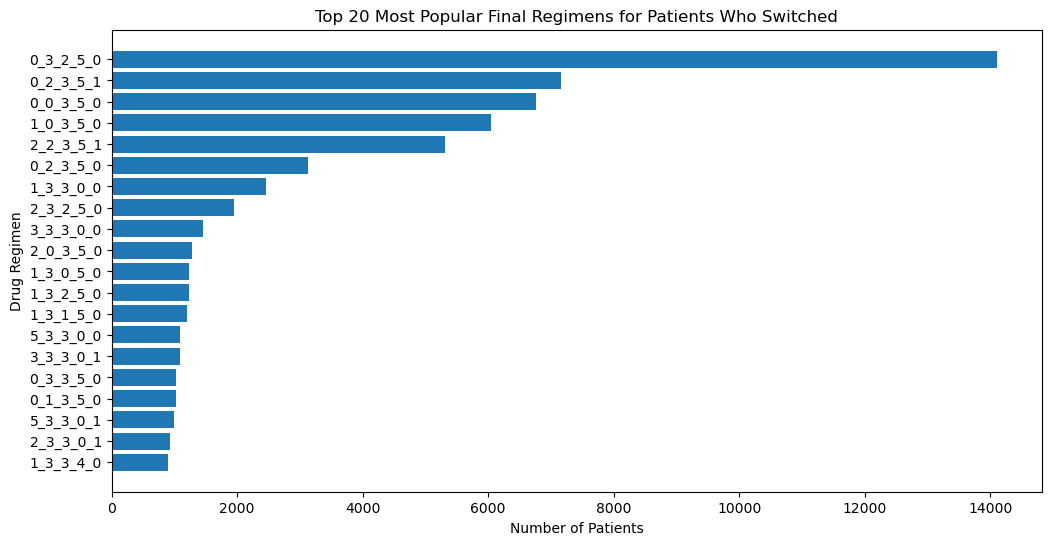

In [94]:
switch_regimen_final_counts = switch_regimen_patients["last"].value_counts().reset_index()
switch_regimen_final_counts.columns = ["Final Regimen", "Patient Count"]

top_20_switch_final_regimens = switch_regimen_final_counts.head(20)
plt.figure(figsize=(12, 6))
plt.barh(top_20_switch_final_regimens["Final Regimen"], top_20_switch_final_regimens["Patient Count"])
plt.xlabel("Number of Patients")
plt.ylabel("Drug Regimen")
plt.title("Top 20 Most Popular Final Regimens for Patients Who Switched")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [95]:
regimens = df["Regimen"].unique()

In [96]:
first_regimen = df.sort_values(by=["ID", "Month"]).groupby("ID").first().reset_index()

# Calculate the percentage of males for each regimen
regimen_gender_distribution = first_regimen.groupby("Regimen")["Gender"].value_counts(normalize=True).unstack() * 100
regimen_gender_distribution = regimen_gender_distribution.rename(columns={1: "Percent Male", 2: "Percent Female"}).fillna(0)

regimen_gender_distribution

Gender,Percent Male,Percent Female
Regimen,,
0_0_2_5_0,0.000000,100.000000
0_0_3_5_0,93.841642,6.158358
0_0_3_5_1,66.666667,33.333333
0_1_0_5_0,100.000000,0.000000
0_1_2_5_0,95.121951,4.878049
...,...,...
5_3_0_0_0,100.000000,0.000000
5_3_0_5_0,100.000000,0.000000
5_3_2_5_0,100.000000,0.000000


In [97]:
missing_inital_regimens = df[~df["Regimen"].isin(first_regimen["Regimen"])]["Regimen"].unique()
missing_inital_regimens

array(['2_3_3_0_1', '1_3_3_3_0', '2_2_3_5_1', '2_3_3_5_1', '1_3_3_5_1',
       '5_3_3_0_1', '5_3_2_5_1', '5_3_2_0_1', '2_2_3_5_0', '2_3_2_0_0',
       '3_3_3_2_0', '2_0_3_5_1', '5_2_3_5_0', '5_2_3_5_1', '5_2_2_5_1',
       '2_2_2_5_1', '0_3_2_1_0', '2_2_2_5_0', '5_0_3_0_0', '2_3_3_1_1',
       '2_3_2_5_1', '2_3_3_4_0', '0_2_3_4_1', '1_3_3_2_0', '2_3_3_0_0',
       '5_2_3_0_0', '1_2_3_0_0', '3_3_2_0_1', '2_3_3_3_0', '3_1_2_5_0',
       '5_3_2_0_0', '2_1_3_5_0', '2_1_3_5_1', '0_3_3_1_1', '2_2_3_0_1',
       '5_2_3_0_1', '1_1_3_1_0', '1_3_3_0_1', '3_3_2_4_0', '4_3_3_4_1',
       '2_3_3_4_1', '2_2_3_4_1', '5_3_3_5_1', '2_0_2_5_0', '1_3_1_2_0',
       '3_3_2_0_0', '2_3_2_0_1', '0_3_2_5_1', '3_1_3_5_1', '5_1_3_5_0',
       '1_3_2_0_0', '3_2_3_1_0', '5_3_3_2_0', '3_2_2_5_1', '0_3_3_3_0',
       '0_0_3_2_0', '3_3_3_4_1', '2_2_3_0_0'], dtype=object)

In [98]:
df_regimen_schedule = df.groupby("ID")["Regimen"].apply(lambda x: tuple(dict.fromkeys(x))).reset_index()
df_regimen_schedule.columns = ["ID", "Regimen Schedule"]
df_regimen_schedule

,ID,Regimen Schedule
0,30133543973798,"(0_1_3_5_0, 0_2_3_5_1, 2_2_3_5_1, 0_0_3_5_0, 0..."
1,198464063523553,"(3_3_3_1_0, 2_3_3_0_1, 3_3_3_0_1)"
2,277500844403792,"(4_3_3_4_0, 1_3_3_0_1, 0_2_3_5_1, 1_3_3_0_0)"
3,427534741934736,"(0_3_1_5_0,)"
4,480089982195338,"(0_3_1_5_0, 0_3_2_5_0)"
...,...,...
187231,18446061799332322003,"(4_3_1_5_0, 4_3_3_4_0, 0_2_3_5_1, 0_0_3_5_0, 1..."
187232,18446128306909613693,"(0_3_2_5_0,)"
187233,18446294480367750440,"(4_3_3_5_0, 0_3_2_5_0, 4_3_2_5_0)"
187234,18446335763543073043,"(3_3_3_1_0, 4_3_3_1_0, 0_3_2_5_0)"


In [99]:
regimen_schedule_counts = df_regimen_schedule['Regimen Schedule'].value_counts().reset_index()
regimen_schedule_counts.columns = ['Regimen Schedule', 'Patient Count']
regimen_schedule_counts_significant = regimen_schedule_counts[regimen_schedule_counts['Patient Count'] > 500]
regimen_schedule_counts_significant

,Regimen Schedule,Patient Count
0,"(1_0_3_5_0,)",19950
1,"(0_3_2_5_0,)",16842
2,"(0_3_1_5_0,)",11844
3,"(0_3_1_5_0, 0_3_2_5_0)",10059
4,"(3_3_3_1_0,)",6027
5,"(0_3_2_5_0, 0_3_1_5_0)",4788
6,"(0_0_3_5_0,)",3024
7,"(1_3_3_0_0,)",2184
8,"(3_3_3_3_0,)",2142
9,"(0_2_3_5_1, 2_2_3_5_1)",2037


In [100]:
df_regimen_schedule[df_regimen_schedule['Regimen Schedule'] == 	('0_3_1_5_0', '0_3_2_5_0', '2_3_2_5_0')]

,ID,Regimen Schedule
474,47148402718267190,"(0_3_1_5_0, 0_3_2_5_0, 2_3_2_5_0)"
933,91315896470935083,"(0_3_1_5_0, 0_3_2_5_0, 2_3_2_5_0)"
1373,134991828168134873,"(0_3_1_5_0, 0_3_2_5_0, 2_3_2_5_0)"
1474,144067466145661850,"(0_3_1_5_0, 0_3_2_5_0, 2_3_2_5_0)"
1833,179174409066131451,"(0_3_1_5_0, 0_3_2_5_0, 2_3_2_5_0)"
...,...,...
186267,18348393648616607271,"(0_3_1_5_0, 0_3_2_5_0, 2_3_2_5_0)"
186713,18395649196817525924,"(0_3_1_5_0, 0_3_2_5_0, 2_3_2_5_0)"
187013,18425851498153284795,"(0_3_1_5_0, 0_3_2_5_0, 2_3_2_5_0)"
187096,18434018720922853704,"(0_3_1_5_0, 0_3_2_5_0, 2_3_2_5_0)"


In [112]:
regimen_schedule_gender = pd.merge(regimen_schedule_counts_significant, df_regimen_schedule, on='Regimen Schedule', how='inner')
patient_gender = df.groupby(['ID'])['Gender'].first().reset_index()
regimen_schedule_gender = pd.merge(regimen_schedule_gender, patient_gender, on='ID', how='inner')
regimen_schedule_gender = regimen_schedule_gender.groupby("Regimen Schedule")["Gender"].value_counts(normalize=True).unstack() * 100
regimen_schedule_gender = regimen_schedule_gender.reset_index().fillna(0)
regimen_schedule_gender.columns = ['Regimen Scheudle', 'Percent Male', 'Percent Female']
regimen_schedule_gender

,Regimen Scheudle,Percent Male,Percent Female
0,"(0_0_3_5_0,)",95.833333,4.166667
1,"(0_0_3_5_0, 2_0_3_5_0)",100.000000,0.000000
2,"(0_1_3_5_0,)",100.000000,0.000000
3,"(0_2_3_5_1,)",81.250000,18.750000
4,"(0_2_3_5_1, 2_2_3_5_1)",96.907216,3.092784
5,"(0_3_1_5_0,)",97.695035,2.304965
6,"(0_3_1_5_0, 0_3_2_5_0)",96.242171,3.757829
7,"(0_3_1_5_0, 0_3_2_5_0, 2_3_2_5_0)",84.000000,16.000000
8,"(0_3_1_5_0, 1_3_1_5_0)",87.692308,12.307692
9,"(0_3_2_5_0,)",97.132170,2.867830


In [110]:
9695700/(9695700+1538460)

0.8630551816958277

In [116]:
regimen_schedule_race = pd.merge(regimen_schedule_counts_significant, df_regimen_schedule, on='Regimen Schedule', how='inner')
patient_race = df.groupby(['ID'])['Ethnic'].first().reset_index()
regimen_schedule_race = pd.merge(regimen_schedule_race, patient_race, on='ID', how='inner')
regimen_schedule_race = regimen_schedule_race.groupby("Regimen Schedule")["Ethnic"].value_counts(normalize=True).unstack() * 100
regimen_schedule_race = regimen_schedule_race.reset_index().fillna(0)
regimen_schedule_race.columns = ['Regimen Scheudle', 'Percent Asian', 'Percent Black', 'Percent White', 'Other']
regimen_schedule_race

,Regimen Scheudle,Percent Asian,Percent Black,Percent White,Other
0,"(0_0_3_5_0,)",0.000000,1.388889,82.638889,15.972222
1,"(0_0_3_5_0, 2_0_3_5_0)",0.000000,0.000000,97.727273,2.272727
2,"(0_1_3_5_0,)",0.000000,0.000000,0.000000,100.000000
3,"(0_2_3_5_1,)",0.000000,0.000000,6.250000,93.750000
4,"(0_2_3_5_1, 2_2_3_5_1)",0.000000,0.000000,83.505155,16.494845
5,"(0_3_1_5_0,)",0.000000,7.446809,2.127660,90.425532
6,"(0_3_1_5_0, 0_3_2_5_0)",0.000000,4.592902,1.252610,94.154489
7,"(0_3_1_5_0, 0_3_2_5_0, 2_3_2_5_0)",4.000000,56.000000,28.000000,12.000000
8,"(0_3_1_5_0, 1_3_1_5_0)",0.000000,56.923077,13.846154,29.230769
9,"(0_3_2_5_0,)",0.000000,0.249377,2.244389,97.506234


In [121]:
df['Ethnic'].value_counts()/(187236*60)

Ethnic
4    0.646703
3    0.213997
2    0.117990
1    0.021310
Name: count, dtype: float64